# Topic Modelling with LDA
[Kaggle](https://www.kaggle.com/rcushen/topic-modelling-with-lsa-and-lda)

## Imports

In [1]:
import numpy as np
import pandas as pd
# from IPython.display import display
# from tqdm import tqdm
from collections import Counter
# import ast

import matplotlib.pyplot as plt
# import matplotlib.mlab as mlab
# import seaborn as sb

from sklearn.feature_extraction.text import CountVectorizer
# from textblob import TextBlob
# import scipy.stats as stats

from sklearn.decomposition import TruncatedSVD
# from sklearn.decomposition import LatentDirichletAllocation
# from sklearn.manifold import TSNE

# from bokeh.plotting import figure, output_file, show
# from bokeh.models import Label
# from bokeh.io import output_notebook
# output_notebook()

# %matplotlib inline

## Read in the data

In [2]:
reports = pd.read_csv('reports.csv')
reports

,Unnamed: 0,filepath,lang,text,number_of_pages
0,0,./reports/scraped/full/mtu.pdf,deu,MTU\n\nAero Engines\n\nGeschäftsbericht\n\nMTU...,226
1,1,./reports/scraped/full/henkel.pdf,deu,\n\nYa voneaus\n\n \n\nzz\nN\n\npr...,219
2,2,./reports/scraped/full/heidelbergcement.pdf,deu,\n \n\nHIEIDELBERGCEMENT\n\n \n \n \n ...,96
3,3,./reports/scraped/full/daimler.pdf,deu,DAIMIER\n\n \n\n \n\nNachhaltigkeitsbericht ...,205
4,4,./reports/scraped/full/infineon.pdf,deu,\n\nNachhaltigkeit bei Infineon\n\nInfineon\n...,68
5,5,./reports/scraped/full/dpdhl.pdf,deu,Deutsche Post DHL\nGroup\n\nNACHHALTIGKEITSFAH...,2
6,6,./reports/scraped/full/volkswagenag.pdf,eng,VOLKSWAGEN\n\nAKTIENGESELLSCHAFT\n\n \n\nSUSTA...,97
7,7,./reports/scraped/full/report.basf.pdf,eng,About This Report 1 To Our Shareholders\n\nRes...,42
8,8,./reports/scraped/full/fresenius.pdf,eng,= FRESENIUS\n\n2020\n\n \n\nANNUAL REPORT\nMed...,338
9,9,./reports/scraped/full/new.siemens.pdf,eng,Nachhaltigkeits-\ninformationen\n\n2020\n\n \n...,150


## Transform
- exclude german texts
- remove linebreaks
- turn words to lowercase

In [3]:
# exclude german texts
reports = reports[reports['lang'] == 'eng']
reports.reset_index(drop=True, inplace=True)
reports

,Unnamed: 0,filepath,lang,text,number_of_pages
0,6,./reports/scraped/full/volkswagenag.pdf,eng,VOLKSWAGEN\n\nAKTIENGESELLSCHAFT\n\n \n\nSUSTA...,97
1,7,./reports/scraped/full/report.basf.pdf,eng,About This Report 1 To Our Shareholders\n\nRes...,42
2,8,./reports/scraped/full/fresenius.pdf,eng,= FRESENIUS\n\n2020\n\n \n\nANNUAL REPORT\nMed...,338
3,9,./reports/scraped/full/new.siemens.pdf,eng,Nachhaltigkeits-\ninformationen\n\n2020\n\n \n...,150
4,10,./reports/scraped/full/group.pdf,eng,\n\n \n\n \n\na sustainable future.\n\nSust...,139
5,11,./reports/scraped/full/deutsche-boerse.pdf,eng,\n\n \n \n\nDEUTSCHE BORSE\nGROUP\n\n \...,7
6,12,./reports/scraped/full/deutsche-wohnen.pdf,eng,Sustainability Report 2020\n\nFor people.\nFor...,158
7,13,./reports/scraped/full/eon.pdf,eng,Slavery & Human\nTrafficking Statement\n\nE.ON...,3
8,14,./reports/scraped/full/siemens-energy.pdf,eng,SIEMENS\nClaleigen4\n\nSustainability Report 2...,80
9,15,./reports/scraped/full/adidas-group.pdf,eng,\n\nPV p) | py). t)\nSUS\nds\nREPORT\n\n \n\n...,84


In [4]:
# remove linebreaks
reports['text'] = reports['text'].str.replace(r'\s+',' ', regex=True)

<ipython-input-4-007b9df3d4b1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reports['text'] = reports['text'].str.replace(r'\s+',' ', regex=True)


In [5]:
# turn words to lowercase
reports.text = reports.text.str.lower()
reports.head()

/home/fiete/Documents/studium/fuehrung_und_nachhaltigkeit/nlp_env/lib/python3.8/site-packages/pandas/core/generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,Unnamed: 0,filepath,lang,text,number_of_pages
0,6,./reports/scraped/full/volkswagenag.pdf,eng,volkswagen aktiengesellschaft sustainability r...,97
1,7,./reports/scraped/full/report.basf.pdf,eng,about this report 1 to our shareholders respon...,42
2,8,./reports/scraped/full/fresenius.pdf,eng,= fresenius 2020 annual report media hub group...,338
3,9,./reports/scraped/full/new.siemens.pdf,eng,"nachhaltigkeits- informationen 2020 > °. . , °...",150
4,10,./reports/scraped/full/group.pdf,eng,a sustainable future. sustainability report 2...,139


In [6]:
# Define helper functions
def get_top_n_words_for_fig(n_top_words, count_vectorizer, text_data):
    '''
    returns a tuple of the top n words in a sample and their 
    accompanying counts, given a CountVectorizer object and text sample
    '''
    vectorized_headlines = count_vectorizer.fit_transform(text_data.values)
    vectorized_total = np.sum(vectorized_headlines, axis=0)
    word_indices = np.flip(np.argsort(vectorized_total)[0,:], 1)
    word_values = np.flip(np.sort(vectorized_total)[0,:],1)
    
    word_vectors = np.zeros((n_top_words, vectorized_headlines.shape[1]))
    for i in range(n_top_words):
        word_vectors[i,word_indices[0,i]] = 1

    words = [word[0].encode('ascii').decode('utf-8') for 
             word in count_vectorizer.inverse_transform(word_vectors)]

    return (words, word_values[0,:n_top_words].tolist()[0])



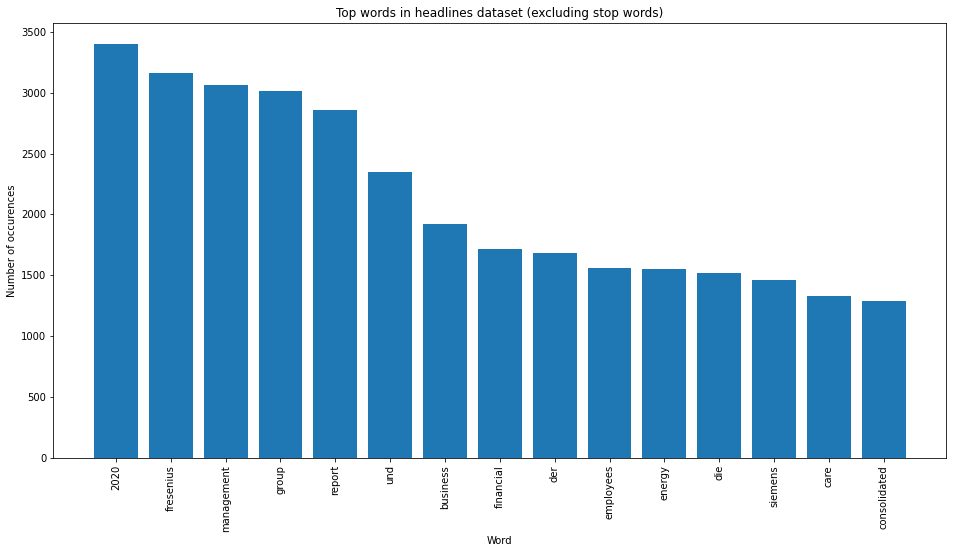

In [7]:
count_vectorizer = CountVectorizer(stop_words='english')
words, word_values = get_top_n_words_for_fig(n_top_words=15,
                                     count_vectorizer=count_vectorizer, 
                                     text_data=reports[reports['lang'] == 'eng']['text'])

fig, ax = plt.subplots(figsize=(16,8))
ax.bar(range(len(words)), word_values);
ax.set_xticks(range(len(words)));
ax.set_xticklabels(words, rotation='vertical');
ax.set_title('Top words in headlines dataset (excluding stop words)');
ax.set_xlabel('Word');
ax.set_ylabel('Number of occurences');
plt.show()


## Topic Modelling

In [8]:

count_vectorizer = CountVectorizer(stop_words='english') # , max_features=40000
#small_text_sample = reindexed_data.sample(n=10000, random_state=0).values

print('Report before vectorization: {}'.format(reports['text'][0][:500]))

document_term_matrix = count_vectorizer.fit_transform(reports['text'])

print('Headline after vectorization: \n{}'.format(document_term_matrix[0][:500]))

Report before vectorization: volkswagen aktiengesellschaft sustainability report 2020 “the coronavirus pandemic hit the volkswagen group at the start of 2020, in the middle of one of the largest transformation processes in the history of our group. from the start, our focus has been on protecting our employees and our business against the threat of covid-19. despite this massive challenge, at the same time we further advanced the group’s restructuring toward decarbonization and mobility for future generations. my express th
Headline after vectorization: 
  (0, 24669)	543
  (0, 2197)	1
  (0, 22065)	220
  (0, 19404)	167
  (0, 429)	177
  (0, 6092)	19
  (0, 17170)	25
  (0, 11835)	2
  (0, 11295)	742
  (0, 21522)	20
  (0, 15311)	1
  (0, 14000)	7
  (0, 22987)	64
  (0, 18208)	90
  (0, 11834)	4
  (0, 9899)	71
  (0, 18415)	10
  (0, 8242)	152
  (0, 4691)	182
  (0, 22627)	2
  (0, 6182)	17
  (0, 317)	25
  (0, 6915)	4
  (0, 14917)	2
  (0, 5089)	9
  :	:
  (0, 23860)	2
  (0, 22019)	1
  (0, 21135)	1
  

## Latent Semantic Analysis (LSA)

In [9]:
n_topics = 8
n_topics = 17
lsa_model = TruncatedSVD(n_components=n_topics)
lsa_topic_matrix = lsa_model.fit_transform(document_term_matrix)

In [10]:
# Define helper functions
def get_keys(topic_matrix):
    '''
    returns an integer list of predicted topic 
    categories for a given topic matrix
    '''
    keys = topic_matrix.argmax(axis=1).tolist()
    return keys

def keys_to_counts(keys):
    '''
    returns a tuple of topic categories and their 
    accompanying magnitudes for a given list of keys
    '''
    count_pairs = Counter(keys).items()
    categories = [pair[0] for pair in count_pairs]
    counts = [pair[1] for pair in count_pairs]
    return (categories, counts)

In [11]:
lsa_keys = get_keys(lsa_topic_matrix)
lsa_categories, lsa_counts = keys_to_counts(lsa_keys)

In [12]:
from scipy.sparse import csr_matrix

# Define helper functions
def get_top_n_words(n, keys, document_term_matrix, count_vectorizer):
    '''
    returns a list of n_topic strings, where each string contains the n most common 
    words in a predicted category, in order
    '''
    top_word_indices = []
    for topic in range(n_topics):
        temp_vector_sum = 0
        for i in range(len(keys)):
            if keys[i] == topic:
                temp_vector_sum += document_term_matrix[i]
        if (isinstance(temp_vector_sum, csr_matrix)):
            temp_vector_sum = temp_vector_sum.toarray()
        elif (isinstance(temp_vector_sum, int)):
            temp_vector_sum = np.zeros((1, document_term_matrix.shape[1]))
        top_n_word_indices = np.flip(np.argsort(temp_vector_sum)[0][-n:],0)
        top_word_indices.append(top_n_word_indices)   
    top_words = []
    for topic in top_word_indices:
        topic_words = []
        for index in topic:
            temp_word_vector = np.zeros((1,document_term_matrix.shape[1]))
            temp_word_vector[:,index] = 1
            the_word = count_vectorizer.inverse_transform(temp_word_vector)[0][0]
            #topic_words.append(the_word.encode('ascii').decode('utf-8'))
            topic_words.append(the_word)
        top_words.append(" ".join(topic_words))         
    return top_words

In [13]:
top_n_words_lsa = get_top_n_words(10, lsa_keys, document_term_matrix, count_vectorizer)

for i in range(len(top_n_words_lsa)):
    print("Topic {}: ".format(i+1), top_n_words_lsa[i])

Topic 1:  fresenius report group management 2020 financial consolidated care business board
Topic 2:  und der die siemens von zu wir auf mit den
Topic 3:  group 2020 management employees gri report business climate energy sustainability
Topic 4:  études equity equals equates equation equilibrium equinix equip equipment equipped
Topic 5:  études equity equals equates equation equilibrium equinix equip equipment equipped
Topic 6:  études equity equals equates equation equilibrium equinix equip equipment equipped
Topic 7:  energy siemens business 2020 sustainability power report environmental company gas
Topic 8:  basf 2020 water 2016 suppliers employees management global use products
Topic 9:  études equity equals equates equation equilibrium equinix equip equipment equipped
Topic 10:  études equity equals equates equation equilibrium equinix equip equipment equipped
Topic 11:  group climate deutsche borse risks risk strategy sustainability business management
Topic 12:  human rights sta

In [14]:
lang = 'en'
lang = pd.DataFrame({'lang': ['en','de']}, columns=['lang'])
lang = lang.lang.map({'en':'eng', 'de':'deu'})
lang

0    eng
1    deu
Name: lang, dtype: object